# Customer Churn Project

https://drive.google.com/file/d/1DS75rKUh7st69uddU19pRKiNhJdkbkxB/view

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/customer_churn (1) (1).csv")

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.sample() # prints a random row from the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3878,2223-GDSHL,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,8297.5,No


In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2171,3995-WFCSM,Female,0,No,No,2,Yes,No,DSL,No,...,Yes,No,No,Yes,Month-to-month,No,Electronic check,60.85,111.4,No
595,0719-SYFRB,Female,0,No,No,12,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,61.65,713.75,Yes
3242,3717-FDJFU,Male,0,No,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,106.9,No
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
368,9571-EDEBV,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),98.65,6962.85,No
5193,7096-ZNBZI,Female,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),26.45,1914.5,No
2495,6188-UXBBR,Female,0,Yes,No,38,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.25,814.75,No
4011,8143-ETQTI,Female,0,Yes,Yes,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.65,451.55,No
3239,3890-RTCMS,Male,0,No,No,16,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,49.45,799,No
4799,4182-BGSIQ,Female,0,Yes,Yes,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.80,196.75,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# to convert one column from a data type to other datatype we can use astype method  .astype()

In [ ]:
# "51" -- 51
# "1.1" -- 1.1

# "abc" - error will be raised

# for this reason we try to avoid using astype method to convert a column into numeric datatype

# instead we use pd.to_numeric

# in this we can use a parameter -- errors = ignore, coerce

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# drop the null values
# fill with some specific value
# fill with mean, median, mode
# fill ffill, bfill -- df[temp] = df['temp'].ffill(), df['temp'] = df['temp'].fillna(method = 'ffill')

In [ ]:
print(df[df.isnull().any(axis = 1)])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges']*df['tenure'])

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated().sum()

np.int64(0)

1. Extract the 5th column and store it in column_5

In [ ]:
column_5 = df.iloc[:,4]
column_5

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


## 2. Extract the 15th column and store it in ‘column_15’

In [ ]:
column_15 = df.iloc[:, 14]
column_15

,StreamingMovies
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,No
7041,No


## 3. Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’

In [ ]:
senior_male_electronic = df[(df['gender']=='Male')&(df['SeniorCitizen']==1) &(df['PaymentMethod']=='Electronic check')]

In [ ]:
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.60,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


1. Extract all those customers whose tenure is greater than 70 months or
their monthly charges is more than $100 and store the result in
‘customer_total_tenure’

2. Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in
‘two_mail_yes’

3. Extract 333 random records from the customer_churndataframe and store
the result in ‘customer_333’.

4. Get the count of different levels from the ‘Churn’ column

In [ ]:
#Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’
customer_total_tenure = df[(df['tenure']>70) | (df['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


In [ ]:
#Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’
two_mail_yes=df[(df['Contract']=='Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [ ]:
#Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’.
customer_333=df.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1906,2361-FJWNO,Male,0,No,No,40,No,No phone service,DSL,No,...,No,Yes,No,No,One year,No,Credit card (automatic),36.00,1382.90,No
224,5961-VUSRV,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.35,219.35,No
4997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70,Yes
5007,7407-SUJIZ,Male,0,No,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.60,541.50,No
6714,7315-WYOAW,Male,0,No,No,13,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,100.75,1313.25,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,2012-NWRPA,Female,1,Yes,No,11,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.55,1131.20,Yes
1070,6166-ILMNY,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),69.75,144.55,Yes
4125,2716-GFZOR,Male,0,Yes,No,43,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),86.10,3551.65,No
4469,6893-ODYYE,Male,0,No,No,50,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,No,One year,Yes,Credit card (automatic),90.10,4549.45,No


In [ ]:
#Get the count of different levels from the ‘Churn’ column
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


# Data Visualisation

Build a bar-plot for the ’InternetService’ column:

a. Set x-axis label to ‘Categories of Internet Service’

b. Set y-axis label to ‘Count of Categories’

c. Set the title of plot to be ‘Distribution of Internet Service’

d. Set the color of the bars to be ‘orange’

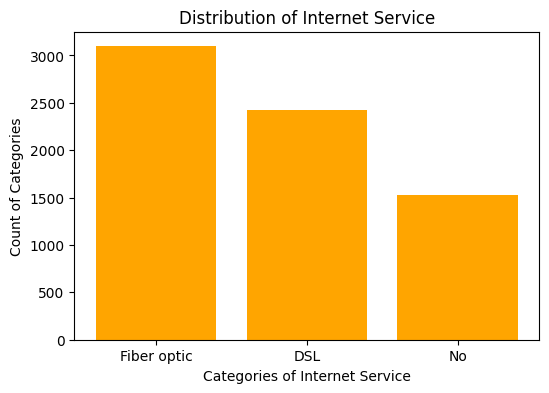

In [ ]:
internet_counts = df["InternetService"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(internet_counts.index, internet_counts.values, color="orange")

plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")

plt.show()

Build a histogram for the ‘tenure’ column:

a. Set the number of bins to be 30

b. Set the color of the bins to be ‘green’

c. Assign the title ‘Distribution of tenure

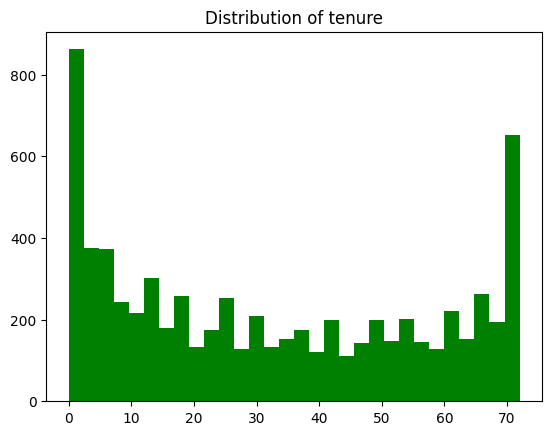

In [ ]:
plt.hist(df['tenure'],color='green',bins=30)
plt.title('Distribution of tenure')
plt.show()

In [ ]:
# bivariate analysis

# Model Building

Linear Regression: Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’: a. Divide the dataset into train and test sets in 70:30 ratio.

b. Build the model on train set and predict the values on test set

c. After predicting the values, find the root mean square error

d. Find out the error in prediction & store the result in ‘error’

e. Find the root mean square error.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [ ]:
x = df[['tenure']]
y = df['MonthlyCharges']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=30, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

np.float64(26.95928631235041)

In [ ]:
error = y_pred - y_test
error

,MonthlyCharges
185,30.434820
2715,42.121925
3825,51.359628
1807,-21.115180
132,24.711043
1263,-14.035530
3732,-15.239773
1672,4.678181
811,-27.828675
2526,35.834820


In [ ]:
r2_score(y_test, y_pred)

0.09851331185337342

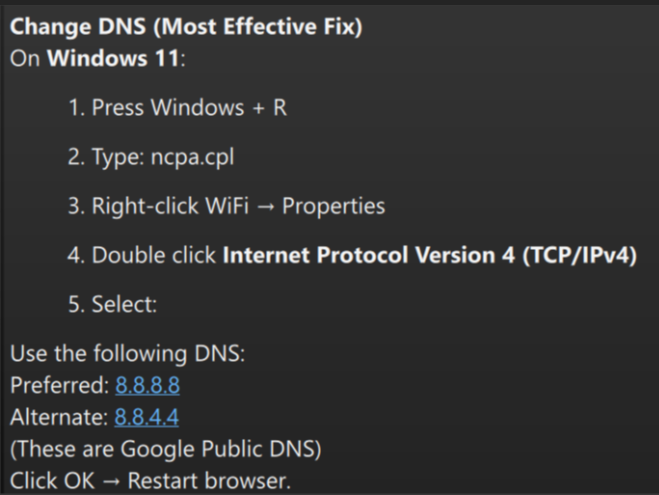

Logistic Regression:

Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’: a. Divide the dataset in 65:35 ratio

b. Build the model on train set and predict the values on test set

c. Build the confusion matrix and get the accuracy score

d. Build a multiple logistic regression model where dependent variable

is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’

e. Divide the dataset in 80:20 ratio

f. Build the model on train set and predict the values on test set

g. Build the confusion matrix and get the accuracy score

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df[["MonthlyCharges"]]
y = df["Churn"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


model1 = LogisticRegression()
model1.fit(X_train, y_train)


y_pred1 = model1.predict(X_test)


cm1 = confusion_matrix(y_test, y_pred1)


as1 = accuracy_score(y_test, y_pred1)


print("Confusion Matrix:\n", cm1)
print("Accuracy Score:", as1)

Confusion Matrix:
 [[1797    0]
 [ 669    0]]
Accuracy Score: 0.7287104622871047


In [ ]:
z = df['MonthlyCharges']

In [ ]:
z

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


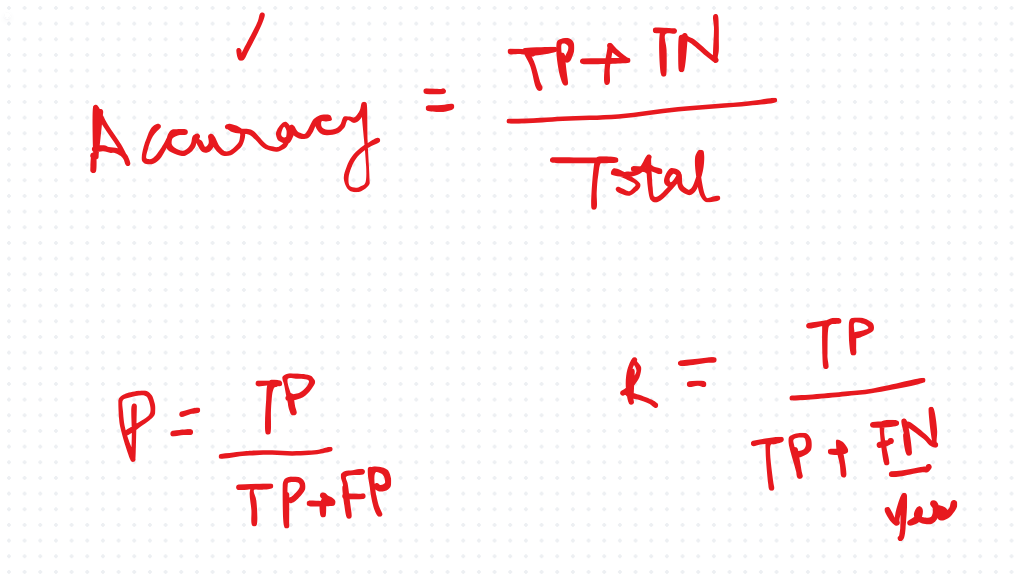

In [ ]:
# Precision -- when my model says yes how many times it is actually correct.

# # quality of +ve prediction

# lets say the precision is 80% then there are person is sick

In [ ]:
# Recall -- how many times you are able to correctly predict its a yes value out of the total yes values available

# missing the correct values so dangerous.

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

          No       0.73      1.00      0.84      1797
         Yes       0.00      0.00      0.00       669

    accuracy                           0.73      2466
   macro avg       0.36      0.50      0.42      2466
weighted avg       0.53      0.73      0.61      2466



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# To sort the class imbalance you can use SMOTE

Decision Tree:

Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:

a. Divide the dataset in 80:20 ratio

b. Build the model on train set and predict the values on test set

c. Build the confusion matrix and calculate the accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
x = df[['tenure']]
y = df['Churn']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[951  85]
 [257 116]]
0.7572746628814763
              precision    recall  f1-score   support

          No       0.79      0.92      0.85      1036
         Yes       0.58      0.31      0.40       373

    accuracy                           0.76      1409
   macro avg       0.68      0.61      0.63      1409
weighted avg       0.73      0.76      0.73      1409

